## Importing libraries

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.impute import SimpleImputer

## Loading .arff type files

In [3]:
df = arff.loadarff('5year.arff')
df = pd.DataFrame(df[0])

In [4]:
df.sample(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
2435,0.040055,0.17469,0.59649,4.4145,67.6860,0.063150,0.082554,3.7560,0.99233,0.65614,...,-0.007729,0.061047,1.00770,0.000000,NaN,4.2187,69.107,5.2817,4.0324,b'0'
4968,0.007050,0.27188,0.61209,3.3105,8.7307,0.002182,0.007050,2.6781,1.52270,0.72812,...,0.322020,0.009682,0.68474,0.000000,2.6059,5.5330,63.502,5.7478,12.3810,b'0'
106,0.075420,0.30117,0.41765,2.3951,75.0100,0.123710,0.100580,1.8614,1.08440,0.56060,...,0.077794,0.134530,0.92221,0.003216,18.5480,3.7446,65.044,5.6116,5.9365,b'0'
2392,0.059428,0.12177,0.31498,3.5867,57.5580,0.167820,0.075139,7.1139,1.06680,0.86625,...,0.062633,0.068603,0.93737,0.000000,7.2968,6.6304,38.356,9.5162,2.0573,b'0'
3819,0.032034,0.31568,0.57968,2.8363,36.8730,0.000000,0.038511,2.1678,3.96380,0.68432,...,0.004120,0.046812,0.99046,0.000000,22.5940,8.3402,29.069,12.5560,37.8820,b'0'


## Renaming input and target variable

In [5]:
# Rename input columns to X(n) format
input_columns = df.columns[:-1]  # Exclude the last column (target column)
renamed_input_columns = [f"X({n})" for n in range(1, len(input_columns) + 1)]
df.rename(columns=dict(zip(input_columns, renamed_input_columns)), inplace=True)

# Rename target column to 'Y'
df.rename(columns={'class': 'Y'}, inplace=True)

In [6]:
df.sample(5)

,X(1),X(2),X(3),X(4),X(5),X(6),X(7),X(8),X(9),X(10),...,X(56),X(57),X(58),X(59),X(60),X(61),X(62),X(63),X(64),Y
1786,0.014305,0.64875,-0.002636,0.99144,-18.218,-0.405970,0.018017,0.54143,0.64701,0.35125,...,0.131400,0.040726,0.97340,0.94907,34.7090,4.4278,173.710,2.10120,0.93133,b'0'
5815,-0.775540,1.51320,-0.560770,0.62941,-34.783,-1.379600,-0.775540,-0.33914,11.16400,-0.51319,...,-0.069533,1.511200,1.06950,0.00000,18.8700,44.2030,49.475,7.37750,234.63000,b'1'
5471,0.106760,0.27805,0.617060,3.21930,35.656,0.000000,0.135240,2.59650,2.77450,0.72195,...,0.050272,0.147880,0.95128,0.00000,7.7811,7.7196,36.578,9.97870,26.45100,b'0'
1700,0.001368,0.34189,0.154190,1.63300,-17.551,-0.006963,0.001434,1.92490,1.02750,0.65811,...,-0.020920,0.002079,0.99866,0.12423,5.2607,5.3893,86.535,4.21790,1.70610,b'0'
2740,-1.355600,2.18210,-1.209100,0.44589,-427.870,-0.043526,-1.355600,-0.54173,1.56200,-1.18210,...,0.246050,1.146800,0.75741,0.00000,37.8430,2.4869,509.900,0.71583,57.79900,b'0'


## Understanding the data

In [7]:
# Get the shape (no of rows & columns) in our dataset

df.shape

(5910, 65)

In [8]:
# Understanding Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X(1)    5907 non-null   float64
 1   X(2)    5907 non-null   float64
 2   X(3)    5907 non-null   float64
 3   X(4)    5889 non-null   float64
 4   X(5)    5899 non-null   float64
 5   X(6)    5907 non-null   float64
 6   X(7)    5907 non-null   float64
 7   X(8)    5892 non-null   float64
 8   X(9)    5909 non-null   float64
 9   X(10)   5907 non-null   float64
 10  X(11)   5907 non-null   float64
 11  X(12)   5889 non-null   float64
 12  X(13)   5910 non-null   float64
 13  X(14)   5907 non-null   float64
 14  X(15)   5904 non-null   float64
 15  X(16)   5892 non-null   float64
 16  X(17)   5892 non-null   float64
 17  X(18)   5907 non-null   float64
 18  X(19)   5910 non-null   float64
 19  X(20)   5910 non-null   float64
 20  X(21)   5807 non-null   float64
 21  X(22)   5907 non-null   float64
 22  

In [9]:
df.describe()

,X(1),X(2),X(3),X(4),X(5),X(6),X(7),X(8),X(9),X(10),...,X(55),X(56),X(57),X(58),X(59),X(60),X(61),X(62),X(63),X(64)
count,5907.000000,5907.000000,5907.000000,5889.000000,5.899000e+03,5907.000000,5907.000000,5892.000000,5909.000000,5907.000000,...,5.910000e+03,5910.000000,5907.000000,5910.000000,5907.000000,5.642000e+03,5895.000000,5910.000000,5889.000000,5803.000000
mean,-0.022347,0.465086,0.189155,4.892476,1.940676e+01,0.022584,-0.111951,5.737741,1.588322,0.545580,...,1.081731e+04,0.057222,-0.263837,0.956504,0.279319,9.110338e+02,10.941497,241.978184,9.127741,65.276716
std,6.163655,5.751283,1.177729,91.434574,2.152932e+04,9.992080,9.057135,102.355101,1.548390,5.763742,...,7.956401e+04,0.698096,18.425091,0.857326,5.840554,6.415469e+04,41.166591,6221.135690,103.074304,2150.645860
min,-463.890000,-430.870000,-72.067000,-0.403110,-1.076400e+06,-463.890000,-517.480000,-3.735100,-3.496000,-71.444000,...,-1.118500e+06,-46.788000,-1236.300000,-0.164390,-184.980000,-1.244000e+01,-0.092493,-236.530000,-1.543200,-3.726500
25%,0.003965,0.255355,0.043953,1.093700,-4.383650e+01,0.000000,0.005889,0.481865,1.014800,0.318940,...,8.791225e+01,0.010996,0.015655,0.876552,0.000000,5.248500e+00,4.278650,44.646750,3.066900,2.147500
50%,0.046670,0.451750,0.219440,1.651700,4.914900e-01,0.000000,0.056500,1.149300,1.139700,0.523320,...,1.802800e+03,0.053218,0.109840,0.950370,0.005675,9.039500e+00,6.198900,73.778500,4.930000,4.098300
75%,0.117050,0.661635,0.418430,2.931000,4.876500e+01,0.108725,0.136905,2.771275,1.825900,0.720805,...,7.705100e+03,0.125085,0.242910,0.990405,0.205215,1.731950e+01,9.350900,118.720000,8.115800,9.204200
max,87.459000,72.416000,28.336000,6845.800000,1.250100e+06,543.250000,5.530000,6868.500000,65.607000,339.850000,...,4.212200e+06,1.651000,87.981000,47.788000,308.150000,4.818700e+06,1308.500000,451380.000000,7641.300000,158180.000000


## Dropping duplicate rows

In [10]:
df.shape

(5910, 65)

In [11]:
df.duplicated().sum()

60

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.shape

(5850, 65)

## Replacing the values of target variable; replacing b'0' by 0 and b'1' by 1.

In [14]:
df['Y'].value_counts()

b'0'    5442
b'1'     408
Name: Y, dtype: int64

In [15]:
df = pd.get_dummies(df,columns=['Y'],drop_first=True)

In [16]:
# Renaming target column again to 'Y'
df.rename(columns={"Y_b'1'": 'Y'}, inplace=True)
df

,X(1),X(2),X(3),X(4),X(5),X(6),X(7),X(8),X(9),X(10),...,X(56),X(57),X(58),X(59),X(60),X(61),X(62),X(63),X(64),Y
0,0.088238,0.55472,0.011340,1.02050,-66.5200,0.342040,0.109490,0.57752,1.08810,0.320360,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.25970,0
1,-0.006202,0.48465,0.232980,1.59980,6.1825,0.000000,-0.006202,1.06340,1.27570,0.515350,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.37000,0
2,0.130240,0.22142,0.577510,3.60820,120.0400,0.187640,0.162120,3.05900,1.14150,0.677310,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.61880,0
3,-0.089951,0.88700,0.269270,1.52220,-55.9920,-0.073957,-0.089951,0.12740,1.27540,0.113000,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.92990,0
4,0.048179,0.55041,0.107650,1.24370,-22.9590,0.000000,0.059280,0.81682,1.51500,0.449590,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.36220,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.000000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.578050,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.179050,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.108860,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


## Handling missing values

In [17]:
# Get the no of missing data points per column

df.isnull().sum()

X(1)       3
X(2)       3
X(3)       3
X(4)      21
X(5)      11
        ... 
X(61)     15
X(62)      0
X(63)     21
X(64)    106
Y          0
Length: 65, dtype: int64

In [18]:
# Get the percentage of missing data points per column

df.isnull().mean()*100

X(1)     0.051282
X(2)     0.051282
X(3)     0.051282
X(4)     0.358974
X(5)     0.188034
           ...   
X(61)    0.256410
X(62)    0.000000
X(63)    0.358974
X(64)    1.811966
Y        0.000000
Length: 65, dtype: float64

In [19]:
# Percentage of data that is missing

total_cells = np.product(df.shape)
missing_values_count = df.isnull().sum()
total_missing = missing_values_count.sum()

percent_missing = (total_missing / total_cells) * 100
print('Percentage of data that is missing in entire dataset :', percent_missing, '% .')

Percentage of data that is missing in entire dataset : 1.218671926364234 % .


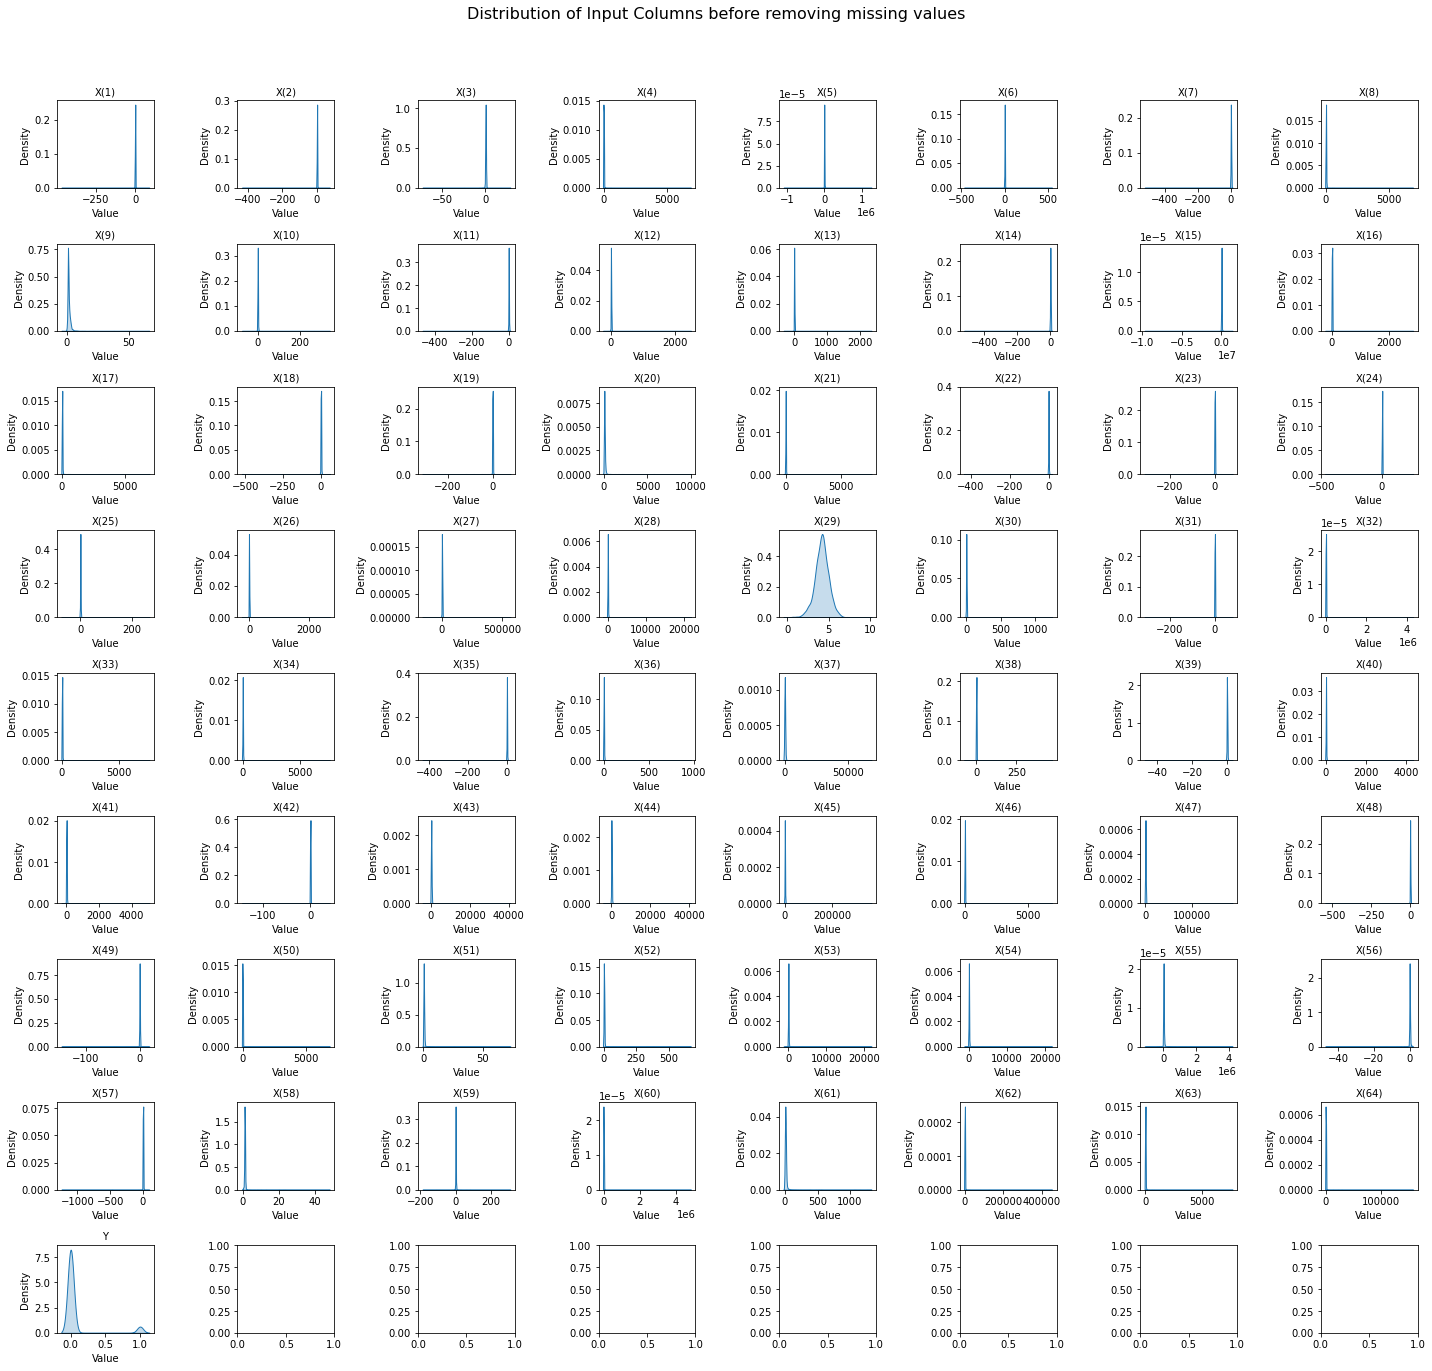

In [20]:
# Calculate the number of rows and columns for the subplot grid
num_cols = 8
num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to ensure all features are included

# Create subplots to display density plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle('Distribution of Input Columns before removing missing values', fontsize=16)

# Iterate through each column and create density plots
for i, column in enumerate(df.columns):
    row_num = i // num_cols
    col_num = i % num_cols
    ax = axes[row_num, col_num]
    
    # Plot density plot for the column
    sns.kdeplot(data=df[column], ax=ax, fill=True)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust layout and spacing of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

In [21]:
import pandas as pd
from sklearn.impute import SimpleImputer

def fill_missing_values(dataset):
    Y = None 
    if Y in dataset.columns:
        target = dataset[Y]
        features = dataset.drop(columns=[Y])
    else:
        features = dataset
    
    # Initialize the imputer with median
    imputer = SimpleImputer(strategy='median')
    
    # Fit and transform the features using the imputer
    filled_features = imputer.fit_transform(features)
    
    # Convert the filled features back to a DataFrame
    filled_features_df = pd.DataFrame(filled_features, columns=features.columns)
    
    # Concatenate target variable back
    if Y in dataset.columns:
        filled_features_df[Y] = target
    
    return filled_features_df

df = fill_missing_values(df)


In [22]:
# Checking again just to make sure that whether data contain missing values or not.

total_cells = np.product(df.shape)
missing_values_count = df.isnull().sum()
total_missing = missing_values_count.sum()

percent_missing = (total_missing / total_cells) * 100
print('Percentage of data that is missing in entire dataset :', percent_missing, '% .')

Percentage of data that is missing in entire dataset : 0.0 % .


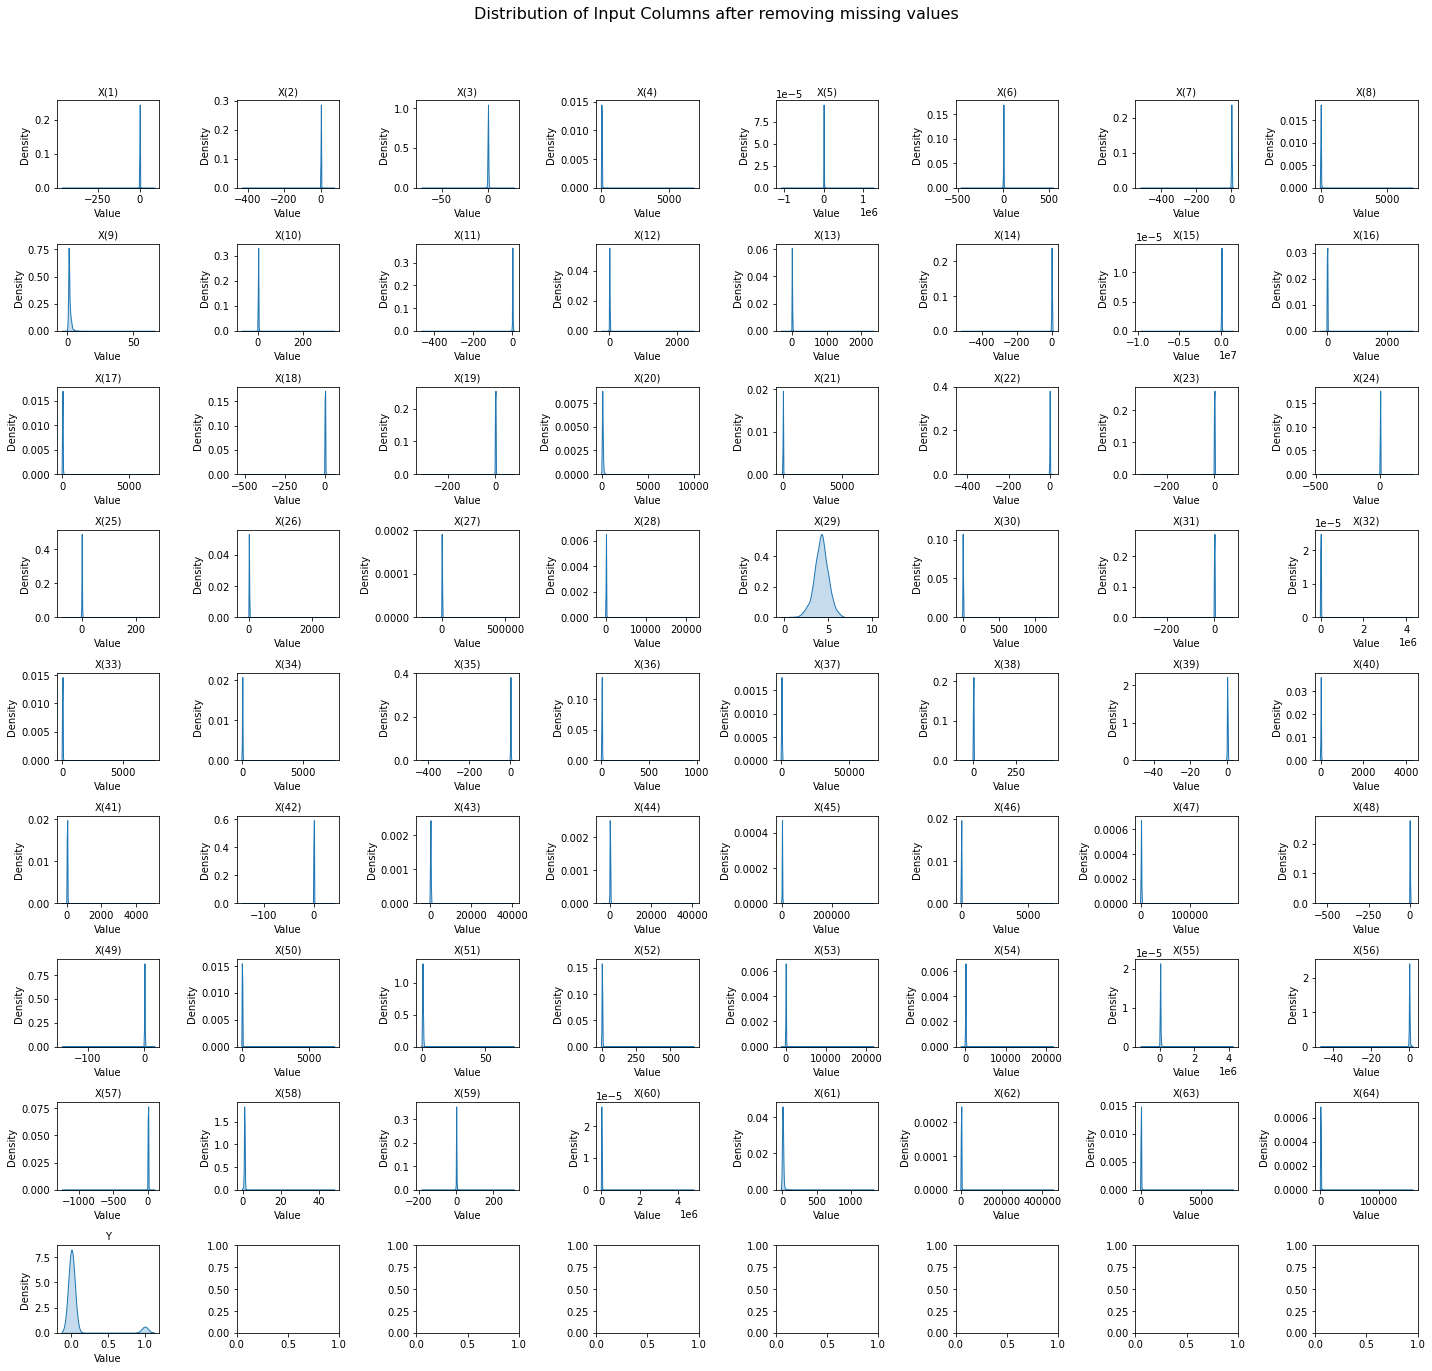

In [23]:
# Number of rows and columns for the subplot grid
num_cols = 8
num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to ensure all features are included

# Creating subplots to display density plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle('Distribution of Input Columns after removing missing values', fontsize=16)

# Iterating through each column and create density plots
for i, column in enumerate(df.columns):
    row_num = i // num_cols
    col_num = i % num_cols
    ax = axes[row_num, col_num]
    
    # Plot density plot for the column
    sns.kdeplot(data=df[column], ax=ax, fill=True)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjusting layout and spacing of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

## Dealing with Outliers

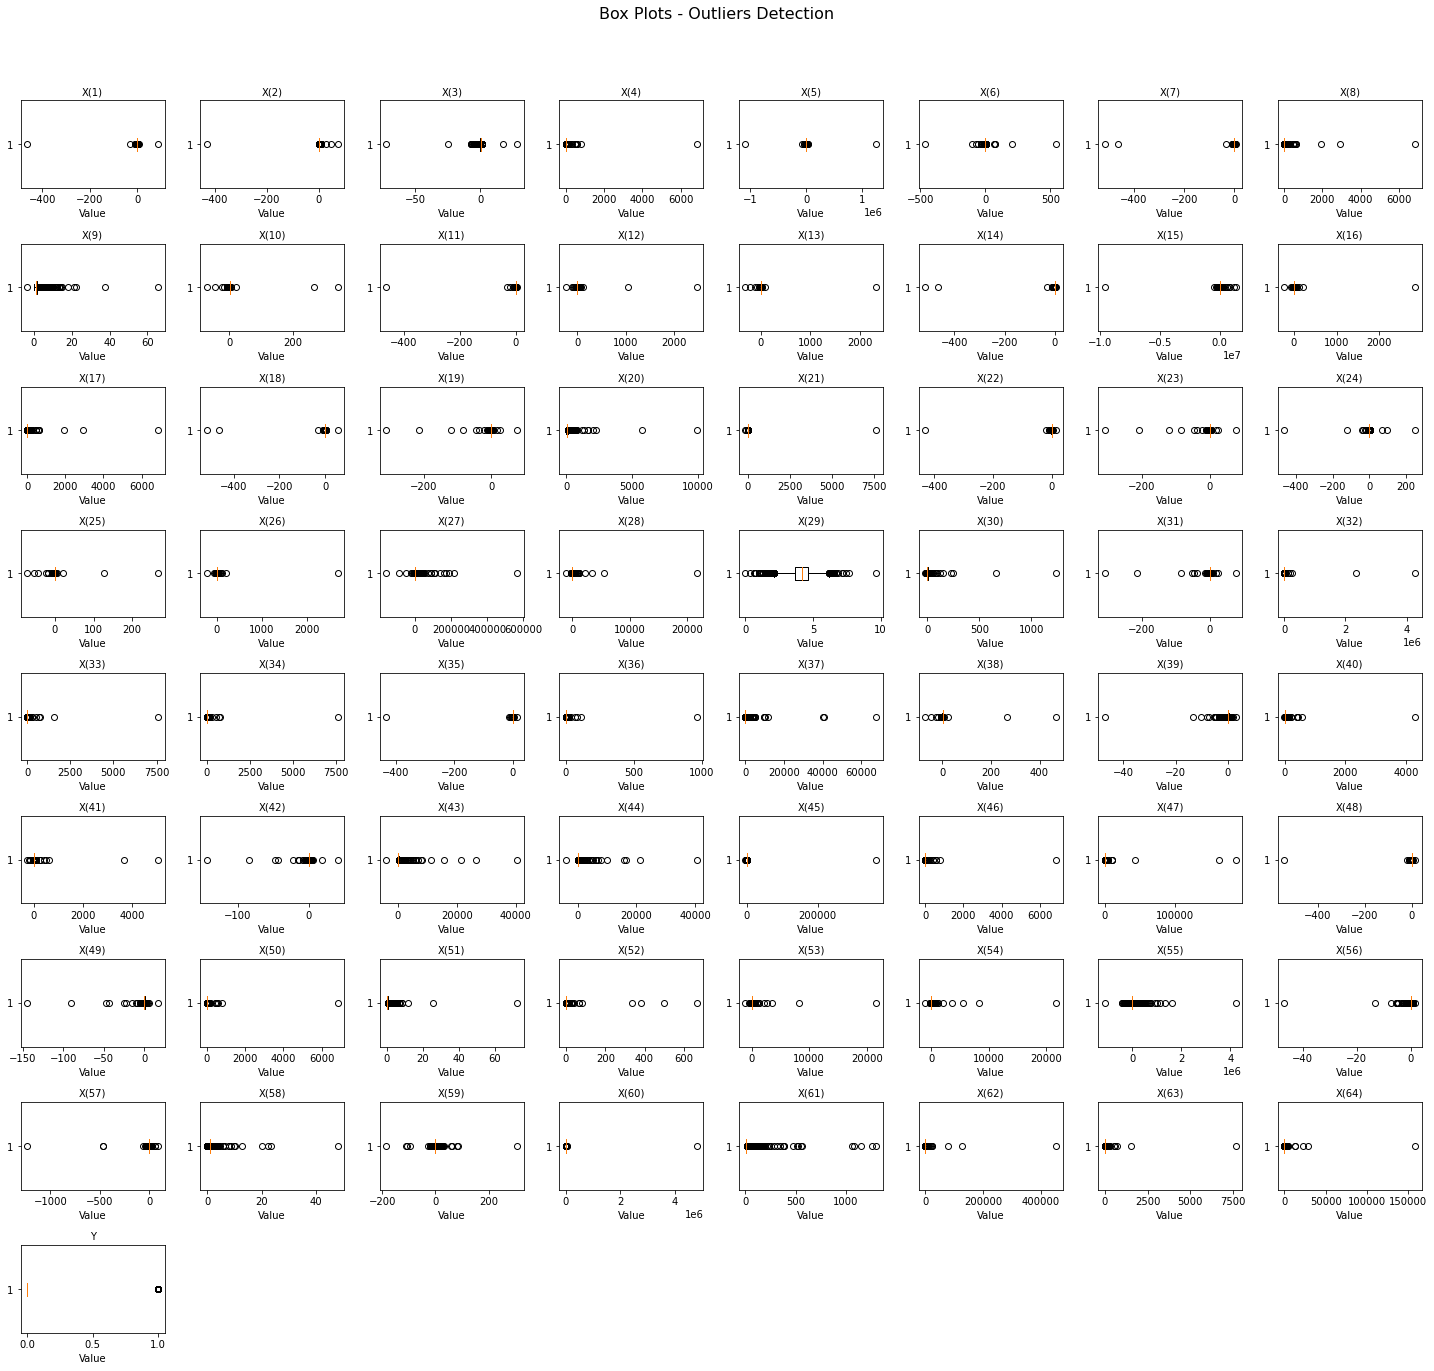

In [24]:
# Creating subplots to display box plots
num_cols =  8  
num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to ensure all features are included

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle('Box Plots - Outliers Detection', fontsize=16)

# Iterating through each column and create box plots
for i, column in enumerate(df.columns):
    row_num = i // num_cols
    col_num = i % num_cols
    ax = axes[row_num, col_num]
    
    # Plot box plot for the column
    ax.boxplot(df[column], vert=False)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('Value')
    
# Hiding empty subplots
for i in range(num_features, num_cols * num_rows):
    row_num = i // num_cols
    col_num = i % num_cols
    axes[row_num, col_num].axis('off')

# Adjusting layout and spacing of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

In [25]:
import pandas as pd

def handle_outliers_iqr(df, target_col='Y', lower_limit=1.5, upper_limit=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for each column
    lower_bound = Q1 - lower_limit * IQR
    upper_bound = Q3 + upper_limit * IQR

    # Treat the outliers in each column
    for col in df.columns:
        if col != target_col:
            df[col] = df[col].apply(lambda x: lower_bound[col] if x < lower_bound[col] else x)
            df[col] = df[col].apply(lambda x: upper_bound[col] if x > upper_bound[col] else x)

    return df

# Call the function to handle outliers in the DataFrame
df = handle_outliers_iqr(df)


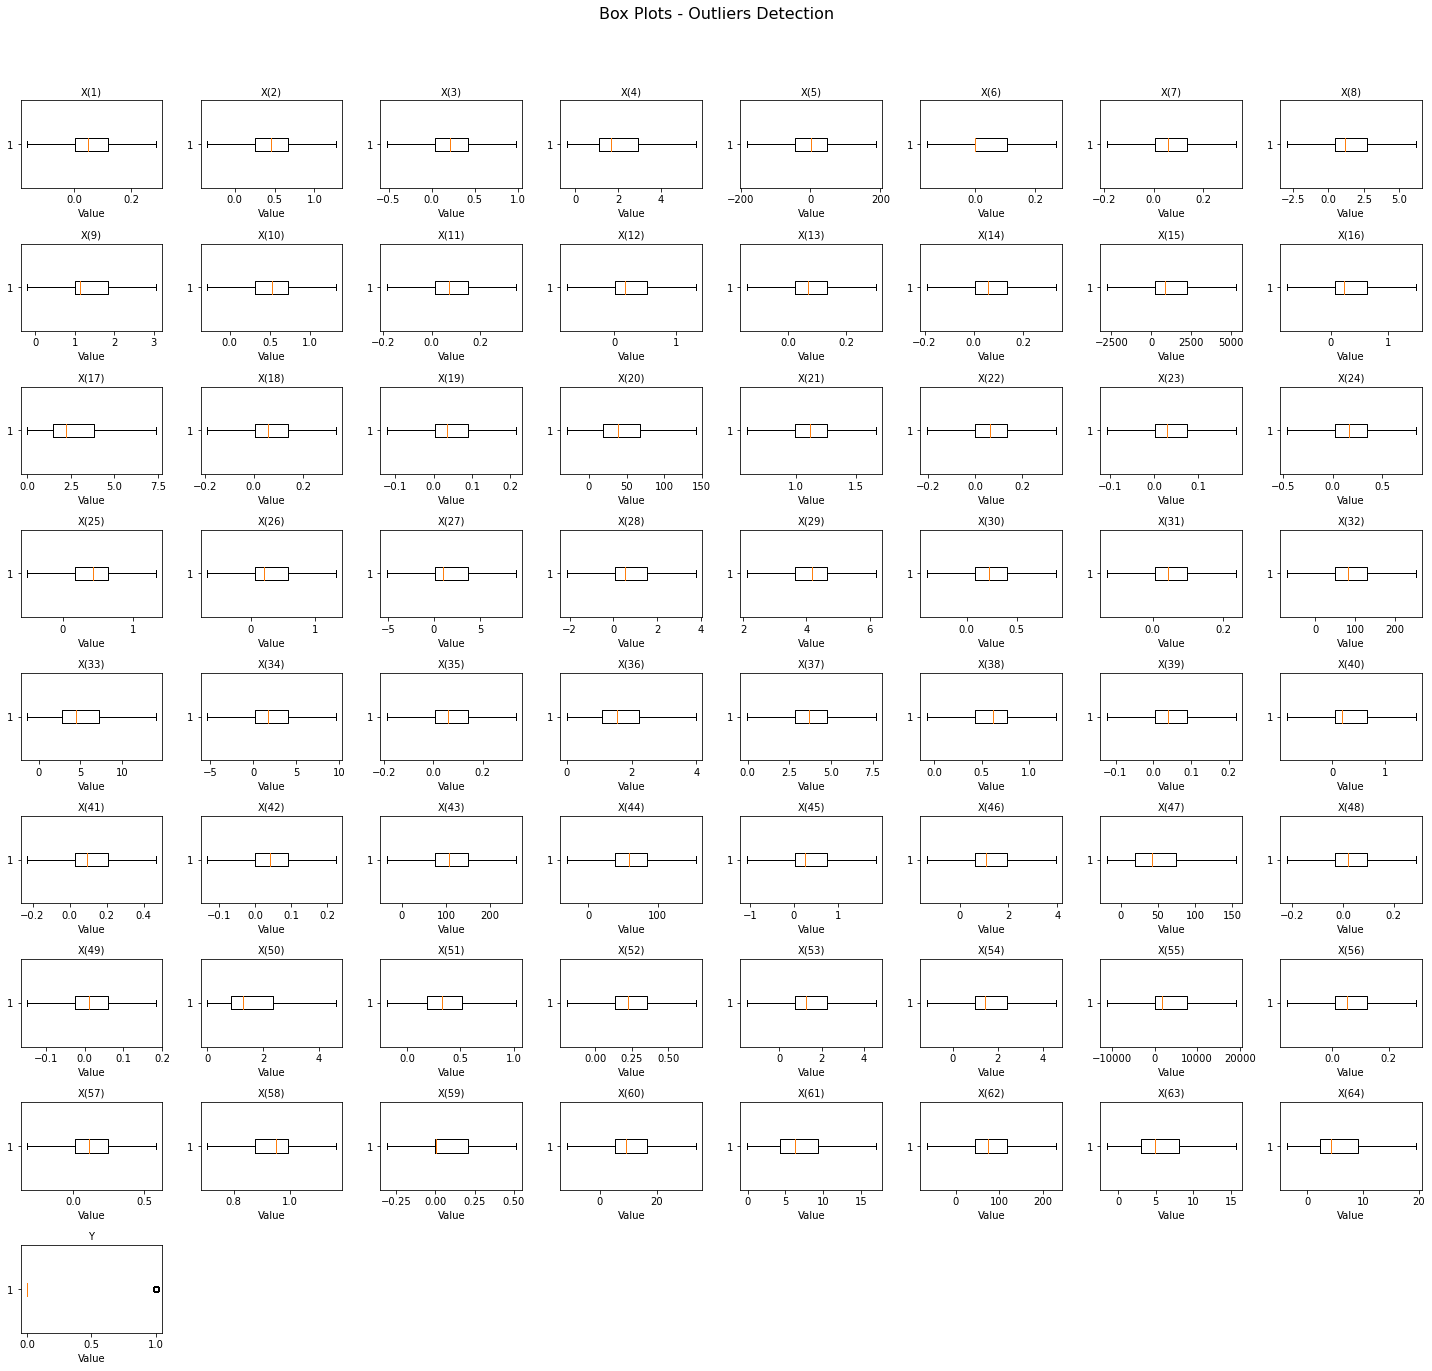

In [26]:
# Creating subplots to display box plots
num_cols =  8  
num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to ensure all features are included

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle('Box Plots - Outliers Detection', fontsize=16)

# Iterating through each column and create box plots
for i, column in enumerate(df.columns):
    row_num = i // num_cols
    col_num = i % num_cols
    ax = axes[row_num, col_num]
    
    # Plot box plot for the column
    ax.boxplot(df[column], vert=False)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('Value')
    
# Hiding empty subplots
for i in range(num_features, num_cols * num_rows):
    row_num = i // num_cols
    col_num = i % num_cols
    axes[row_num, col_num].axis('off')

# Adjusting layout and spacing of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

In [27]:
df.to_csv(r'df5.csv', index=False)